<a href="https://colab.research.google.com/github/tamzid1984/DeepLearning/blob/main/Imageobjectdetecttion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
# importing the modules that are needed
import cv2
from google.colab.patches import cv2_imshow
import numpy as np 
import argparse
import time

In [12]:
config='drive/MyDrive/yolo/yolov3.cfg' # cfg folder
weights='drive/MyDrive/yolo/yolov31.weights' 
class_names ='drive/MyDrive/yolo/coco.names' # data folder

In [13]:
def load_yolo():
    net = cv2.dnn.readNet(config, weights)
    classes = []
    with open(class_names, "r") as f:
        classes = [line.strip() for line in f.readlines()]
        layers_names = net.getLayerNames()
        output_layers = [layers_names[i-1] for i in net.getUnconnectedOutLayers()]
        colors = np.random.uniform(0, 255, size=(len(classes), 3))
    return net, classes, colors, output_layers

In [14]:
def load_image(img_path):
    # image loading
    img = cv2.imread(img_path)
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape
    return img, height, width, channels

In [15]:
def detect_objects(img, net, outputLayers):
    blob = cv2.dnn.blobFromImage(img, scalefactor=0.00392, size=(320, 320), mean=(0, 0, 0), \
                                 swapRB=True, crop=False)
    net.setInput(blob)
    outputs = net.forward(outputLayers)
    return blob, outputs

In [16]:
def get_box_dimensions(outputs, height, width):
    boxes = []
    confs = []
    class_ids = []
    for output in outputs:
        for detect in output:
            scores = detect[5:]
            #print(scores)
            class_id = np.argmax(scores)
            conf = scores[class_id]
            if conf > 0.3:
                center_x = int(detect[0] * width)
                center_y = int(detect[1] * height)
                w = int(detect[2] * width)
                h = int(detect[3] * height)
                x = int(center_x - w/2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confs.append(float(conf))
                class_ids.append(class_id)
    return boxes, confs, class_ids

In [20]:
def draw_labels(boxes, confs, colors, class_ids, classes, img): 
    indexes = cv2.dnn.NMSBoxes(boxes, confs, 0.5, 0.4)
    font = cv2.FONT_HERSHEY_PLAIN
    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x,y), (x+w, y+h), color, 2)
            cv2.putText(img, label, (x, y - 5), font, 1, color, 1)
    cv2_imshow(img)

In [21]:
def image_detect(img_path): 
    model, classes, colors, output_layers = load_yolo()
    image, height, width, channels = load_image(img_path)
    blob, outputs = detect_objects(image, model, output_layers)
    boxes, confs, class_ids = get_box_dimensions(outputs, height, width)
    draw_labels(boxes, confs, colors, class_ids, classes, image)
    while True:
        key = cv2.waitKey(1)
        if key == 27: # Esc
            break

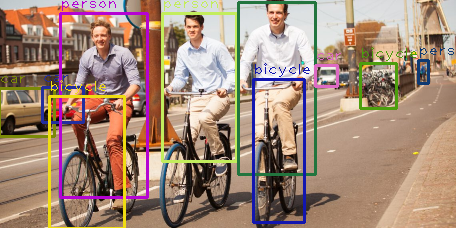

In [ ]:
image1='drive/MyDrive/yolo/Image.jpeg'
image_detect(image1)

In [ ]:
## Object Detecttion